In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [213]:
df = pd.read_csv('IPL.csv')

In [215]:
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

In [246]:
print(f"Number of rows: {df.shape[0]} \nNumber of columns: {df.shape[1]}")

Number of rows: 74 
Number of columns: 20


In [247]:
df.isnull().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

Text(0.5, 0, 'Number of Matches Won')

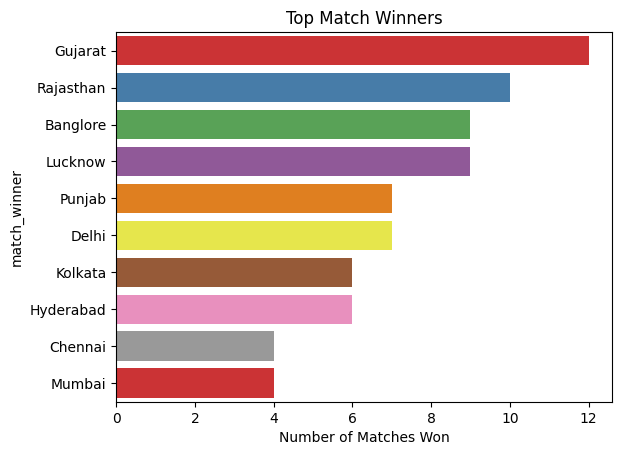

In [269]:
# 1. Which team won the most matches?

match_wins = df['match_winner'].value_counts()
match_wins.sort_values(ascending=False)

sns.barplot(y=match_wins.index, x=match_wins.values, palette='Set1')
plt.title('Top Match Winners')
plt.xlabel('Number of Matches Won')



Text(0.5, 0, 'Toss Decision')

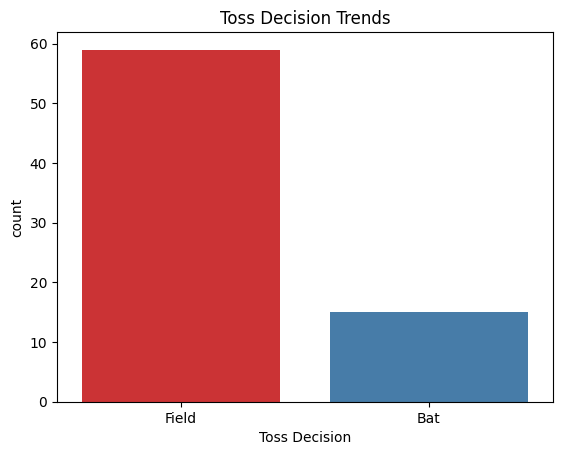

In [274]:
# 2. Toss Decision Trends

sns.countplot(x=df['toss_decision'],palette='Set1')
plt.title('Toss Decision Trends')
plt.xlabel('Toss Decision')

In [292]:
# 3. Toss Winner vs Match Winner?

count = df[df['toss_winner'] == df['match_winner']]['match_id'].count()
print(count)

percentage = (count * 100)/df.shape[0]
print(percentage.round(2))

36
48.65


Text(0.5, 0, '')

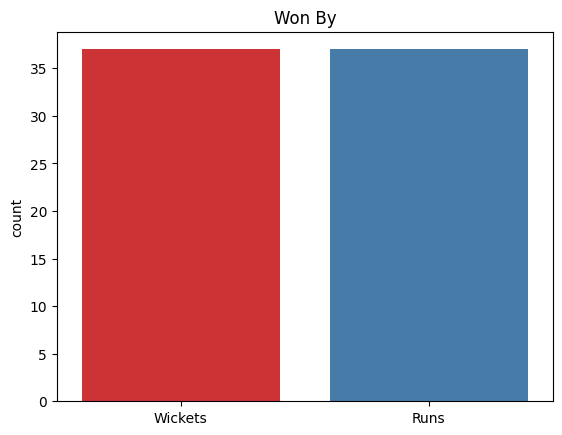

In [299]:
# 4. How do teams wins? (Runs vs Wickets)

sns.countplot(x = df['won_by'], palette='Set1')
plt.title('Won By')
plt.xlabel('')

In [310]:
# Most 'Player of the Match' Awards

count = df['player_of_the_match'].value_counts().head()
print(count)

player_of_the_match
Kuldeep Yadav        4
Jos Buttler          3
Wanindu Hasaranga    2
Umesh Yadav          2
Quinton de Kock      2
Name: count, dtype: int64


Text(0, 0.5, '')

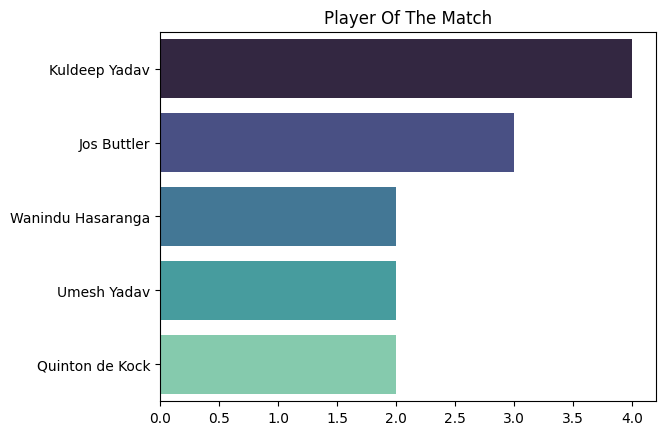

In [319]:
sns.barplot(y=count.index,x=count.values,palette='mako')
plt.title('Player Of The Match')
plt.xlabel('')
plt.ylabel('')

top_scorer
Jos Buttler        651
Quinton de Kock    377
KL Rahul           351
Name: highscore, dtype: int64


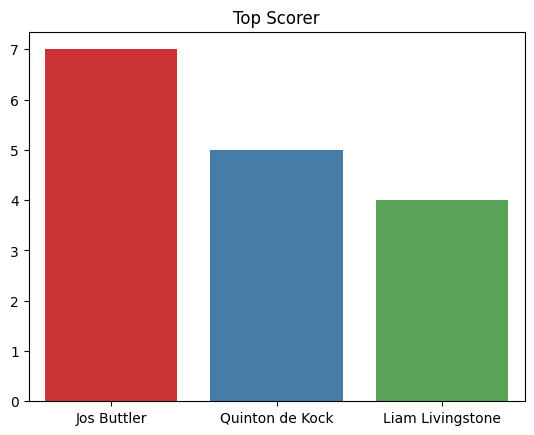

In [326]:
# Top 3 Scorers
ts=df['top_scorer'].value_counts().head(3)
sns.barplot(ts,palette='Set1')
plt.title('Top Scorer')
plt.xlabel('')
plt.ylabel('')


top_scorer
Jos Buttler        651
Quinton de Kock    377
KL Rahul           351
Name: highscore, dtype: int64


Text(0, 0.5, '')

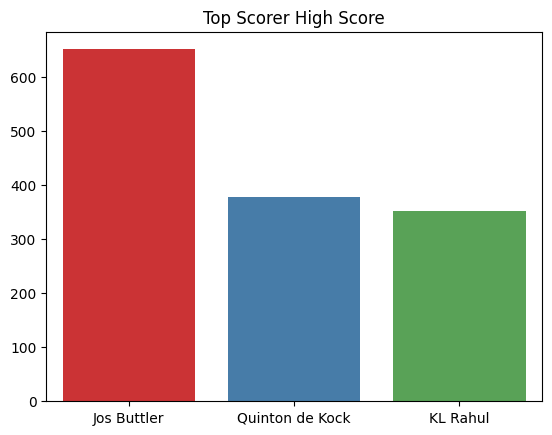

In [342]:
high = df.groupby('top_scorer')['highscore'].sum().sort_values(ascending=False).head(3)
print(high)
sns.barplot(high,palette='Set1')
plt.title('Top Scorer High Score')
plt.xlabel('')
plt.ylabel('')



Text(0, 0.5, '')

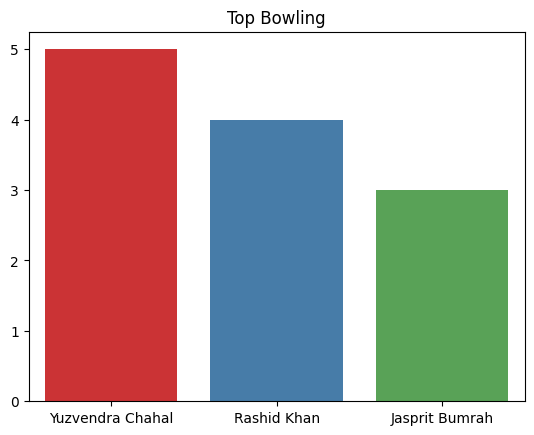

In [346]:
# Best Bowling Figures

ts=df['best_bowling'].value_counts().head(3)
sns.barplot(ts,palette='Set1')
plt.title('Top Bowling')
plt.xlabel('')
plt.ylabel('')

In [351]:
print(df[['best_bowling', 'best_bowling_figure']])


        best_bowling best_bowling_figure
0       Dwayne Bravo               3--20
1      Kuldeep Yadav               3--18
2     Mohammed Siraj               2--59
3     Mohammed Shami               3--25
4   Yuzvendra Chahal               3--22
..               ...                 ...
69     Harpreet Brar               3--26
70     Hardik Pandya               1--14
71    Josh Hazlewood               3--43
72   Prasidh Krishna               3--22
73     Hardik Pandya               3--17

[74 rows x 2 columns]


In [360]:
df['highest_wickets'] = df['best_bowling_figure'].apply(lambda x :x.split('--')[0])
df['highest_wickets'] = df['highest_wickets'].astype(int)

top_bowlers = df.groupby('best_bowling')['highest_wickets'].sum().sort_values(ascending=False).head(7)
top_bowlers

best_bowling
Yuzvendra Chahal    17
Jasprit Bumrah      11
Kuldeep Yadav       11
Rashid Khan         11
Josh Hazlewood      10
Kagiso Rabada       10
Avesh Khan          10
Name: highest_wickets, dtype: int64

Text(0, 0.5, '')

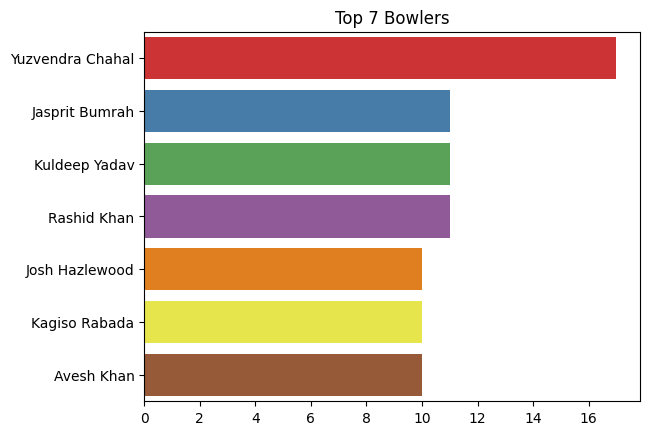

In [371]:
sns.barplot(y=top_bowlers.index, x=top_bowlers.values, palette='Set1')
plt.title('Top 7 Bowlers')
plt.xlabel('')
plt.ylabel('')

venue
Wankhede Stadium, Mumbai                        21
Dr DY Patil Sports Academy, Mumbai              20
Brabourne Stadium, Mumbai                       16
Maharashtra Cricket Association Stadium,Pune    13
Eden Gardens, Kolkata                            2
Name: count, dtype: int64


Text(0, 0.5, '')

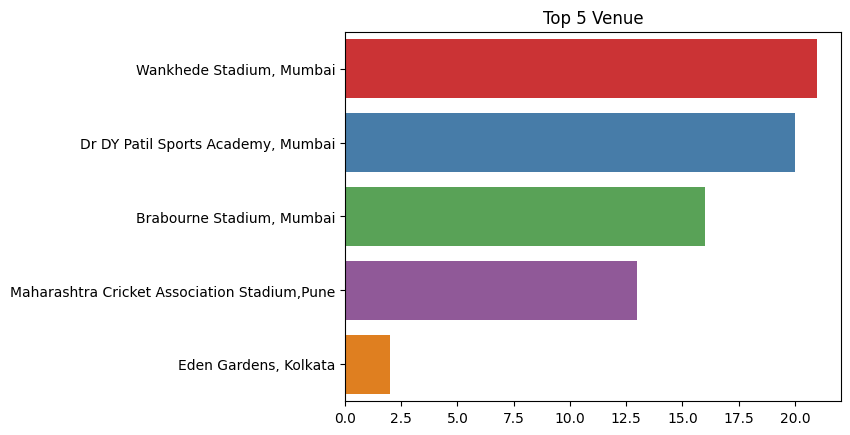

In [378]:
# Most matches played by Venue.

top_venue = df['venue'].value_counts().head(5)
print(top_venue)

sns.barplot(y=top_venue.index, x=top_venue.values, palette='Set1')
plt.title('Top 5 Venue')
plt.xlabel('')
plt.ylabel('')

In [394]:
# Who won the highest margin by runs?
df.head(2)
df[['won_by','margin']]

df[df['won_by']=='Runs'].sort_values(by=['margin'], ascending=False).head(1)[['match_winner','margin']]


,match_winner,margin
54,Chennai,91


In [409]:
 # Which player had the highest individual score?
df.columns

df[df['highscore']==df['highscore'].max()][['match_winner','highscore','top_scorer']]

,match_winner,highscore,top_scorer
65,Lucknow,140,Quinton de Kock
